# CNN on MNIST 

In [2]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras import backend as K
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [4]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
print(K.image_data_format())
print(x_train.shape)

channels_last
(60000, 28, 28)


In [6]:
x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
input_shape = (1, img_rows, img_cols)

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 1, 28, 28)
60000 train samples
10000 test samples


## CNN Model of 3 Layers With BatchNormalization, Dropout and MaxPooling

In [37]:
model3= Sequential()

model3.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=input_shape,data_format='channels_first'))
model3.add(BatchNormalization(axis=-1)) #for conv layer axis=1 ,,

model3.add(Conv2D(160,kernel_size=4,activation='relu'))
model3.add(BatchNormalization(axis=-1)) #for conv layer axis=1
model3.add(Dropout(0.3))
model3.add(MaxPool2D(pool_size=2))

model3.add(Conv2D(196,kernel_size=3,activation='relu'))
model3.add(BatchNormalization(axis=-1)) #for conv layer axis=1

model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(num_classes, activation='softmax'))

In [38]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 32, 26, 26)        320       
_________________________________________________________________
batch_normalization_27 (Batc (None, 32, 26, 26)        104       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 29, 23, 160)       66720     
_________________________________________________________________
batch_normalization_28 (Batc (None, 29, 23, 160)       640       
_________________________________________________________________
dropout_23 (Dropout)         (None, 29, 23, 160)       0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 11, 160)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 12, 9, 196)        282436    
__________

In [39]:
model3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history3=  model3.fit(x_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test))
score = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 266s 4ms/step - loss: 0.2863 - acc: 0.9235 - val_loss: 0.1005 - val_acc: 0.9764
Epoch 2/10
60000/60000 [==============================] - 261s 4ms/step - loss: 0.0870 - acc: 0.9789 - val_loss: 0.1113 - val_acc: 0.9780
Epoch 3/10
60000/60000 [==============================] - 261s 4ms/step - loss: 0.0633 - acc: 0.9849 - val_loss: 0.0997 - val_acc: 0.9859
Epoch 4/10
60000/60000 [==============================] - 261s 4ms/step - loss: 0.0428 - acc: 0.9893 - val_loss: 0.1181 - val_acc: 0.9848
Epoch 5/10
60000/60000 [==============================] - 261s 4ms/step - loss: 0.0329 - acc: 0.9922 - val_loss: 0.1266 - val_acc: 0.9863
Epoch 6/10
60000/60000 [==============================] - 261s 4ms/step - loss: 0.0270 - acc: 0.9935 - val_loss: 0.1303 - val_acc: 0.9856
Epoch 7/10
60000/60000 [==============================] - 261s 4ms/step - loss: 0.0197 - acc: 0.9954 - val_loss: 0.1542 - 

In [40]:
score= model3.evaluate(x_test, y_test, verbose=0)
print('Test score: ',score[0])
print('Test accuracy: ',score[1])

Test score:  0.15075194108878912
Test accuracy:  0.9863


<IPython.core.display.Javascript object>


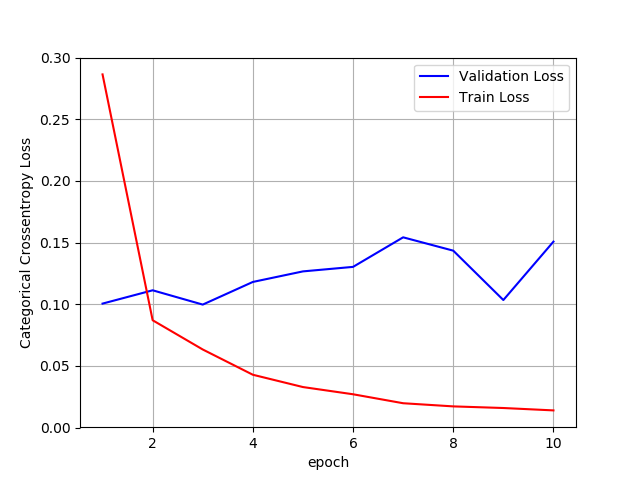

In [41]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,11))
vy = model3.history.history['val_loss']
ty = model3.history.history['loss']
plt_dynamic(x, vy, ty, ax)

Here we have used 3 Convolution Layer with kernel_size=(3,3) with 3,068,778 kernels and 1 Max_Pooling Layers with pool_size=(2,2)  with BatchNormalization and Dropout. By using this model we got Training_Accuracy=98.63%,Training_Loss=0.0139 and Test_Accuracy=98.63%,Test_Loss=0.1507  

## CNN Model of 4 Layers With BatchNormalization, Dropout and MaxPooling Layer.

In [9]:
model= Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape,data_format='channels_first'))
model.add(BatchNormalization(axis=1)) #for conv layer axis=1 ,,

model.add(Conv2D(35,kernel_size=3,activation='relu'))
model.add(BatchNormalization(axis=1)) #for conv layer axis=1
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(0.25))
          
model.add(Conv2D(70,kernel_size=3,activation='relu'))
model.add(BatchNormalization(axis=1)) #for conv layer axis=1
model.add(Dropout(0.25))
          
model.add(Conv2D(100,kernel_size=2,activation='relu'))
model.add(BatchNormalization(axis=1)) #for conv layer axis=1
model.add(MaxPool2D(pool_size=2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 26, 26)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 26, 26)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 24, 35)        8225      
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 24, 35)        120       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 12, 35)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 12, 35)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 10, 70)        22120     
__________

In [11]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 384s 6ms/step - loss: 0.4619 - acc: 0.8613 - val_loss: 0.1001 - val_acc: 0.9718
Epoch 2/12
60000/60000 [==============================] - 365s 6ms/step - loss: 0.1266 - acc: 0.9663 - val_loss: 0.1029 - val_acc: 0.9726
Epoch 3/12
60000/60000 [==============================] - 364s 6ms/step - loss: 0.0838 - acc: 0.9779 - val_loss: 0.0535 - val_acc: 0.9867
Epoch 4/12
60000/60000 [==============================] - 381s 6ms/step - loss: 0.0639 - acc: 0.9829 - val_loss: 0.0476 - val_acc: 0.9885
Epoch 5/12
60000/60000 [==============================] - 378s 6ms/step - loss: 0.0562 - acc: 0.9859 - val_loss: 0.0389 - val_acc: 0.9889
Epoch 6/12
60000/60000 [==============================] - 381s 6ms/step - loss: 0.0452 - acc: 0.9877 - val_loss: 0.0512 - val_acc: 0.9897
Epoch 7/12
60000/60000 [==============================] - 367s 6ms/step - 

In [12]:
score= model.evaluate(x_test, y_test, verbose=0)
print('Test score: ',score[0])
print('Test accuracy: ',score[1])

Test score:  0.036131656656459746
Test accuracy:  0.9925


<IPython.core.display.Javascript object>


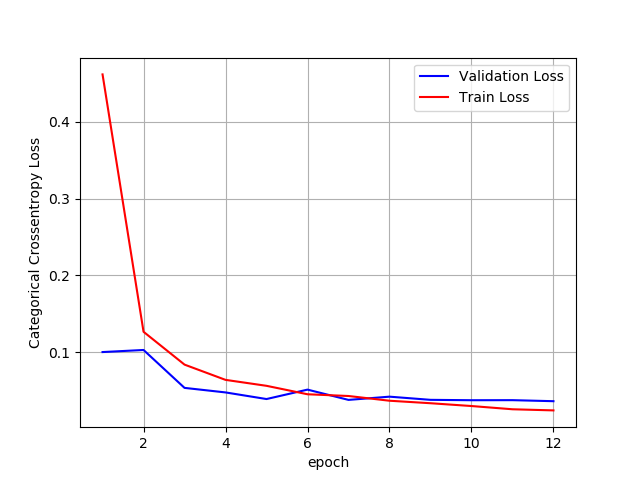

In [13]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,13))
vy = model.history.history['val_loss']
ty = model.history.history['loss']
plt_dynamic(x, vy, ty, ax)

Here we have used 4 Convolution Layer with kernel_size=(3,3) with 375,173 kernels and 2 Max_Pooling Layers with pool_size=(2,2) with BatchNormalization and Dropout. By using this model we got Training_Accuracy=99.38%,Training_Loss=0.0241 and Test_Accuracy=99.25,Test_Loss=0.0361

# CNN Model of 7 Layers With BatchNormalization, Dropout and MaxPooling Layer.

In [20]:
model2.reset_states()

In [21]:
model2= Sequential()

model2.add(Conv2D(32,kernel_size=6,activation='relu',input_shape=input_shape,data_format='channels_first'))
model2.add(BatchNormalization(axis=-1)) #for conv layer axis=1 ,,

model2.add(Conv2D(150,kernel_size=5,activation='relu'))
model2.add(BatchNormalization(axis=-1)) #for conv layer axis=1
model2.add(Dropout(0.3))
          
model2.add(Conv2D(150,kernel_size=4,activation='relu'))
model2.add(BatchNormalization(axis=-1)) #for conv layer axis=1
model2.add(Dropout(0.2))

model2.add(Conv2D(200,kernel_size=4,padding='same',activation='relu'))
model2.add(BatchNormalization(axis=-1)) #for conv layer axis=1
model2.add(Dropout(0.25))

model2.add(Conv2D(200,kernel_size=3,activation='relu'))
model2.add(BatchNormalization(axis=-1)) #for conv layer axis=1
model2.add(Dropout(0.35))

model2.add(Conv2D(150,kernel_size=3,padding='same',activation='relu'))
model2.add(Dropout(0.25))
          
model2.add(Conv2D(180,kernel_size=3,activation='relu'))
model2.add(BatchNormalization(axis=-1)) #for conv layer axis=1
model2.add(MaxPool2D(pool_size=2))

model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes, activation='softmax'))

In [22]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 32, 23, 23)        1184      
_________________________________________________________________
batch_normalization_18 (Batc (None, 32, 23, 23)        92        
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 28, 19, 150)       86400     
_________________________________________________________________
batch_normalization_19 (Batc (None, 28, 19, 150)       600       
_________________________________________________________________
dropout_15 (Dropout)         (None, 28, 19, 150)       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 25, 16, 150)       360150    
_________________________________________________________________
batch_normalization_20 (Batc (None, 25, 16, 150)       600       
__________

In [23]:
model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history2=  model2.fit(x_train, y_train,
          batch_size=150,
          epochs=13,
          verbose=1,
          validation_data=(x_test, y_test))
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/13
60000/60000 [==============================] - 902s 15ms/step - loss: 0.5966 - acc: 0.8275 - val_loss: 0.2085 - val_acc: 0.9585
Epoch 2/13
60000/60000 [==============================] - 888s 15ms/step - loss: 0.1367 - acc: 0.9654 - val_loss: 0.0849 - val_acc: 0.9800
Epoch 3/13
60000/60000 [==============================] - 888s 15ms/step - loss: 0.0893 - acc: 0.9787 - val_loss: 0.0911 - val_acc: 0.9822
Epoch 4/13
60000/60000 [==============================] - 887s 15ms/step - loss: 0.0714 - acc: 0.9831 - val_loss: 0.0464 - val_acc: 0.9907
Epoch 5/13
60000/60000 [==============================] - 887s 15ms/step - loss: 0.0595 - acc: 0.9858 - val_loss: 0.0490 - val_acc: 0.9900
Epoch 6/13
60000/60000 [==============================] - 887s 15ms/step - loss: 0.0493 - acc: 0.9876 - val_loss: 0.0521 - val_acc: 0.9900
Epoch 7/13
60000/60000 [==============================] - 887s 15ms/step - loss: 0.0418 - acc: 0.9897 - val_loss: 0.

In [24]:
score= model2.evaluate(x_test, y_test, verbose=0)
print('Test score: ',score[0])
print('Test accuracy: ',score[1])

Test score:  0.05553952041512905
Test accuracy:  0.9909


<IPython.core.display.Javascript object>


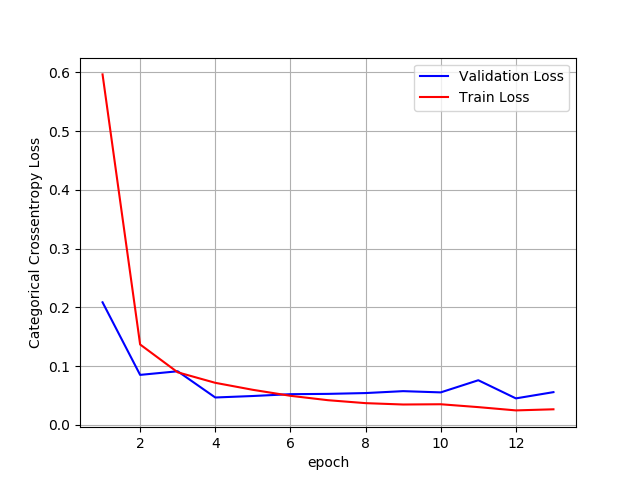

In [25]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,14))
vy = model2.history.history['val_loss']
ty = model2.history.history['loss']
plt_dynamic(x, vy, ty, ax)

Here we have used 7 Convolution Layer with kernel_size=(3,3) with 3,194,704 kernels and 1 Max_Pooling Layers with pool_size=(2,2) with BatchNormalization and Dropout. By using this model we got Training_Accuracy=99.40%,Training_Loss= 0.0263 and Test_Accuracy=99.09,Test_Loss=0.0555

In [8]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = [ "No.Convolution_Layer","Kernel_Sizes",'No.of_Max_Pooling_Layers','Pool_Size','Test_Accuracy']

In [9]:
x.add_row(['3','(3x3)','1','(2x2)','98.63%'])
x.add_row(['4','(3x3)','2','(2x2)','99.35%'])
x.add_row(['7','(3x3)','1','(2x2)','99.03%'])
print(x)

+----------------------+--------------+--------------------------+-----------+---------------+
| No.Convolution_Layer | Kernel_Sizes | No.of_Max_Pooling_Layers | Pool_Size | Test_Accuracy |
+----------------------+--------------+--------------------------+-----------+---------------+
|          3           |    (3x3)     |            1             |   (2x2)   |     98.63%    |
|          4           |    (3x3)     |            2             |   (2x2)   |     99.35%    |
|          7           |    (3x3)     |            1             |   (2x2)   |     99.03%    |
+----------------------+--------------+--------------------------+-----------+---------------+
